In [114]:
import pandas as pd
import numpy as np

# 1. Cargar los datos
ruta_contador = r"Z:\\AMIM\\Alejandro\\Docs\\EMCA\\EMCA24\\Insumos\\contador_250107.csv"
ruta_aforos = r"Z:\\AMIM\\Alejandro\\Docs\\EMCA\\EMCA24\\Insumos\\puntos_control_emca24.csv"
ruta_salida = r"Z:\\AMIM\\Alejandro\\Docs\\EMCA\\EMCA24\\proyeccion_aforos_2024.csv"

In [116]:
contador = pd.read_csv(ruta_contador, parse_dates=["Fecha"], dayfirst=True)
af2023_2024 = pd.read_csv(ruta_aforos)

# 1.1 Preparar datos del contador permanente
contador["mes"] = contador["Fecha"].dt.month
conteo_mensual = contador.groupby("mes")["Ciclistas"].sum()
indice_estacional = conteo_mensual / conteo_mensual.mean()

# 2. Preparar datos de aforos 2023 y 2024
# Normalizar los datos de diciembre 2024 utilizando el índice estacional
af2023_2024 = af2023_2024.assign(mes=12)  # Todos los aforos son de diciembre 2024
af2023_2024 = af2023_2024.merge(indice_estacional.reset_index(name="indice"), how="left", on="mes")
af2023_2024["AH24_normalizado"] = af2023_2024["AH 24"] / af2023_2024["indice"]

# Normalizar los datos de marzo 2023 utilizando el índice estacional
indice_marzo = indice_estacional.loc[3]  # Marzo es el mes 3
af2023_2024["A23_normalizado"] = af2023_2024["A23"] / indice_marzo

# 3. Comparar incrementos entre 2023 y 2024 para horas equivalentes
af2023_2024["incremento"] = af2023_2024["AH24_normalizado"] / af2023_2024["AH 23"]
incremento_medio = af2023_2024["incremento"].mean()

# 4. Proyección para 2024 en todos los puntos
af2023_2024["A24_estimado"] = af2023_2024["A 23"] * incremento_medio

# 5. Ajustar por estacionalidad y calcular el total
af2023_2024["A24_ajustado"] = af2023_2024["A24_estimado"] * af2023_2024["indice"]

In [130]:
af2023_2024

,#,CVE,Cruces,MUN,A 23,H 24,AH 24,AH 23,%Diff,#Diff,A 24,mes,indice,AH24_normalizado,incremento,A24_estimado,A24_ajustado
0,1,PT_13,Av. Aurelio Ortega/C. Francisco Mora,ZPN,940,12:30 a 13:30,40,38,5.26%,2,989,12,0.840196,47.607939,1.252841,1970.131605,1655.296683
1,1,PT_31,Av. Juan Pablo II/C. López Cotilla,ZPN,929,9:45 a 10:45,66,34,94.12%,32,"1,803",12,0.840196,78.553100,2.310385,1947.076873,1635.926190
2,1,PT_55,Boulevard del Rodeo/Prolongación Los Laureles,ZPN,694,11:00 a 12:00,29,33,-12.12%,-4,610,12,0.840196,34.515756,1.045932,1454.543972,1222.102019
3,2,PT_15,C. Hospital/Calz Independencia Norte,GDL,721,12:00 a 13:00,32,36,-11.11%,-4,641,12,0.840196,38.086352,1.057954,1511.132859,1269.647775
4,2,PT_29,Calz. Federalismo/C. Chihuahua,GDL,1060,9:45 a 10:45,43,63,-31.75%,-20,723,12,0.840196,51.178535,0.812358,2221.637767,1866.611153
5,2,PT_50,Av. Fray Antonio Alcalde/C. Guanajuato,GDL,752,11:00 a 12:00,43,43,0.00%,0,752,12,0.840196,51.178535,1.190198,1576.105284,1324.237347
6,3,PT_12,Calz. Revolución/C. Corregidora,GDL,1253,10:15 a 11:15,74,108,-31.48%,-34,859,12,0.840196,88.074688,0.815506,2626.143512,2206.475260
7,3,PT_32,Av. 16 de Septiembre/Av. Juárez,GDL,1210,9:30 a 10:30,178,84,111.90%,94,"2,564",12,0.840196,211.855330,2.522087,2536.020470,2130.754241
8,3,PT_62,C. Esteban Loera/C. Gigantes,GDL,518,12:00 a 13:00,79,66,19.70%,13,620,12,0.840196,94.025680,1.424632,1085.668267,912.174130
9,4,PT_04,Av. Chapultepec Sur/C. Manuel López Cotilla,GDL,899,12:15 a 13:15,51,80,-36.25%,-29,573,12,0.840196,60.700123,0.758752,1884.200333,1583.097573


In [124]:
a = pd.DataFrame(indice_estacional)

In [126]:
a

,Ciclistas
mes,
1,0.885415
2,1.006362
3,1.083186
4,0.928655
5,1.118778
6,1.115388
7,1.126214
8,0.975211
9,0.871840


In [128]:
# Exportar resultados
af2023_2024.to_csv(ruta_salida, index=False)

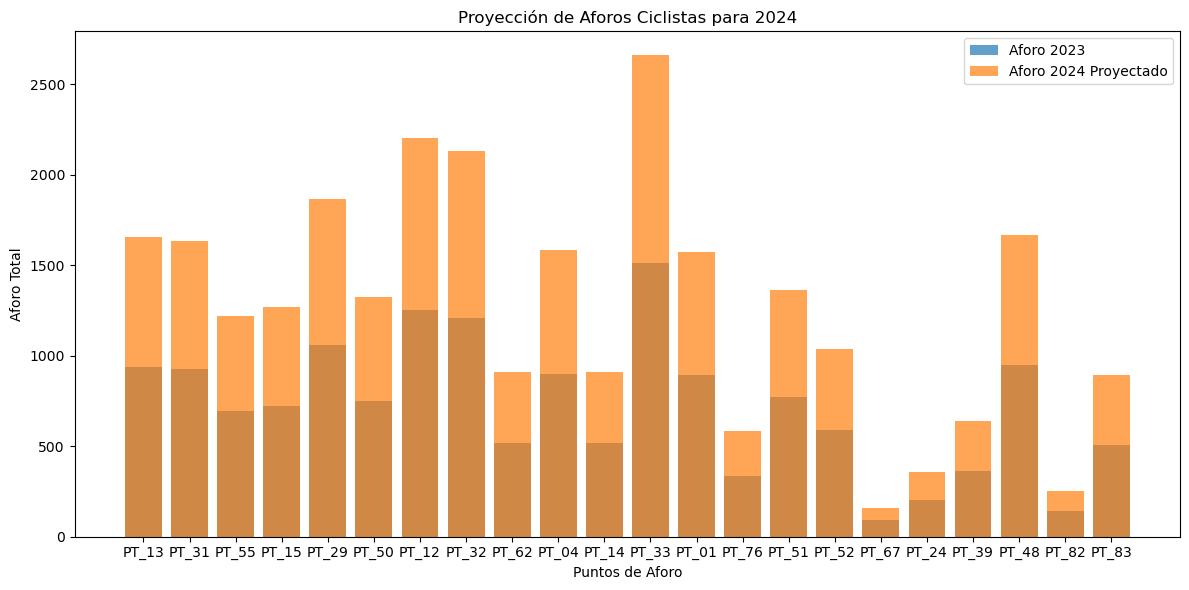

In [108]:
# Visualización de comparación
def plot_proyeccion(df):
    import matplotlib.pyplot as plt
    puntos = df["CVE"]
    aforo_2023 = df["A 23"]
    aforo_2024 = df["A24_ajustado"]

    plt.figure(figsize=(12, 6))
    plt.bar(puntos, aforo_2023, label="Aforo 2023", alpha=0.7)
    plt.bar(puntos, aforo_2024, label="Aforo 2024 Proyectado", alpha=0.7)
    plt.xlabel("Puntos de Aforo")
    plt.ylabel("Aforo Total")
    plt.title("Proyección de Aforos Ciclistas para 2024")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_proyeccion(af2023_2024)